In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Reading data

In [125]:
df = pd.read_csv("./onlinefoods.csv")
df.describe()
# df.info()
df.drop(columns={'Unnamed: 12'},inplace=True)
df.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
373,30,Male,Married,Self Employeed,More than 50000,Graduate,1,13.0809,77.5565,560097,No,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
82,23,Male,Single,Student,No Income,Post Graduate,3,12.9343,77.6044,560029,Yes,Positive
34,22,Female,Single,Student,No Income,Post Graduate,2,12.9119,77.6446,560102,Yes,Positive
214,24,Female,Single,Employee,10001 to 25000,Post Graduate,4,12.9337,77.5900,560011,Yes,Positive


##### data visualization:

In [126]:
columns = df.columns
columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

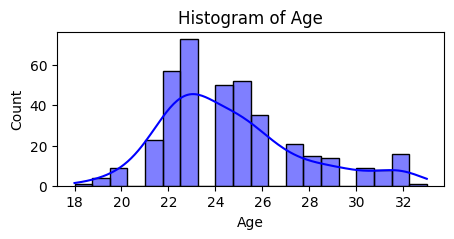

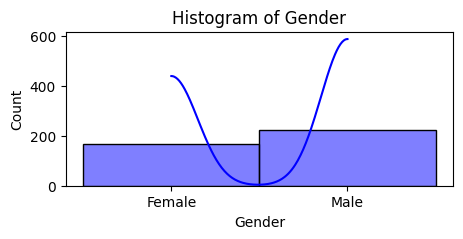

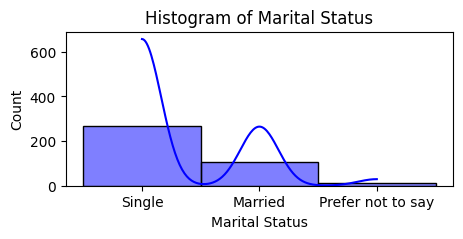

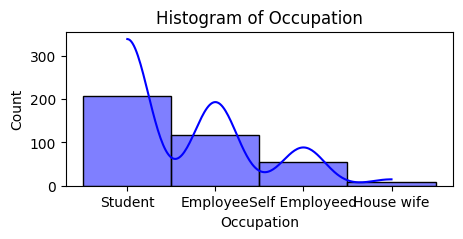

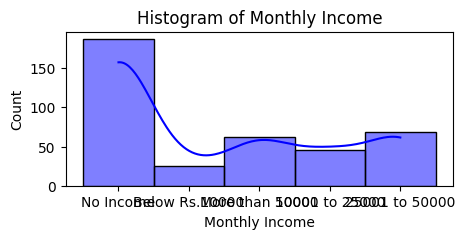

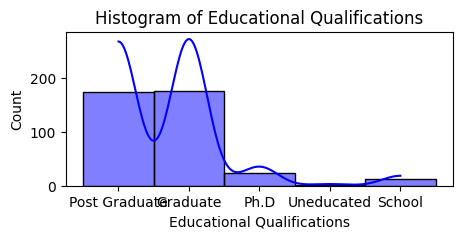

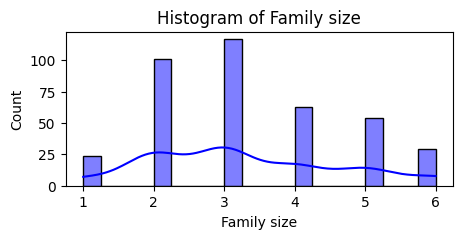

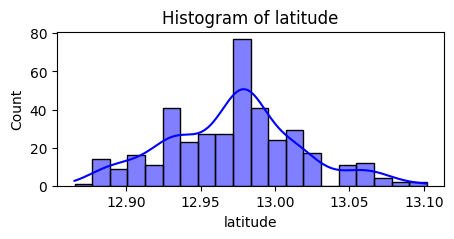

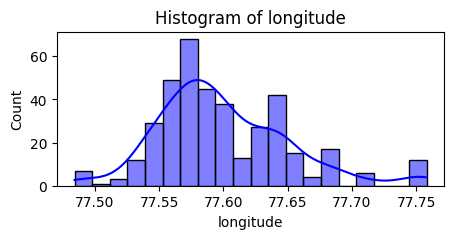

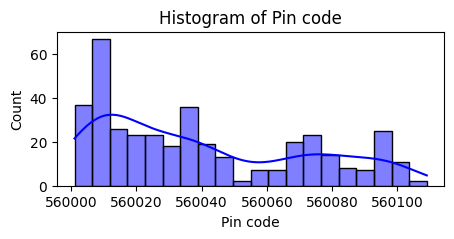

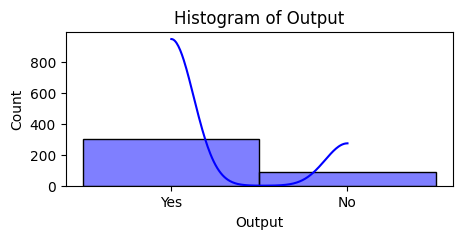

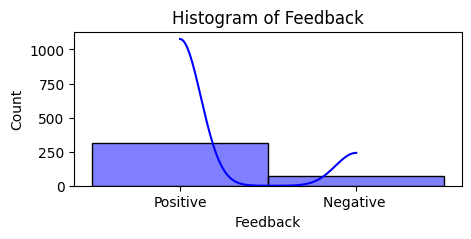

In [127]:
for column in columns:
    plt.figure(figsize=(5, 2)) 
    sns.histplot(df[column], kde=True, bins=20, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

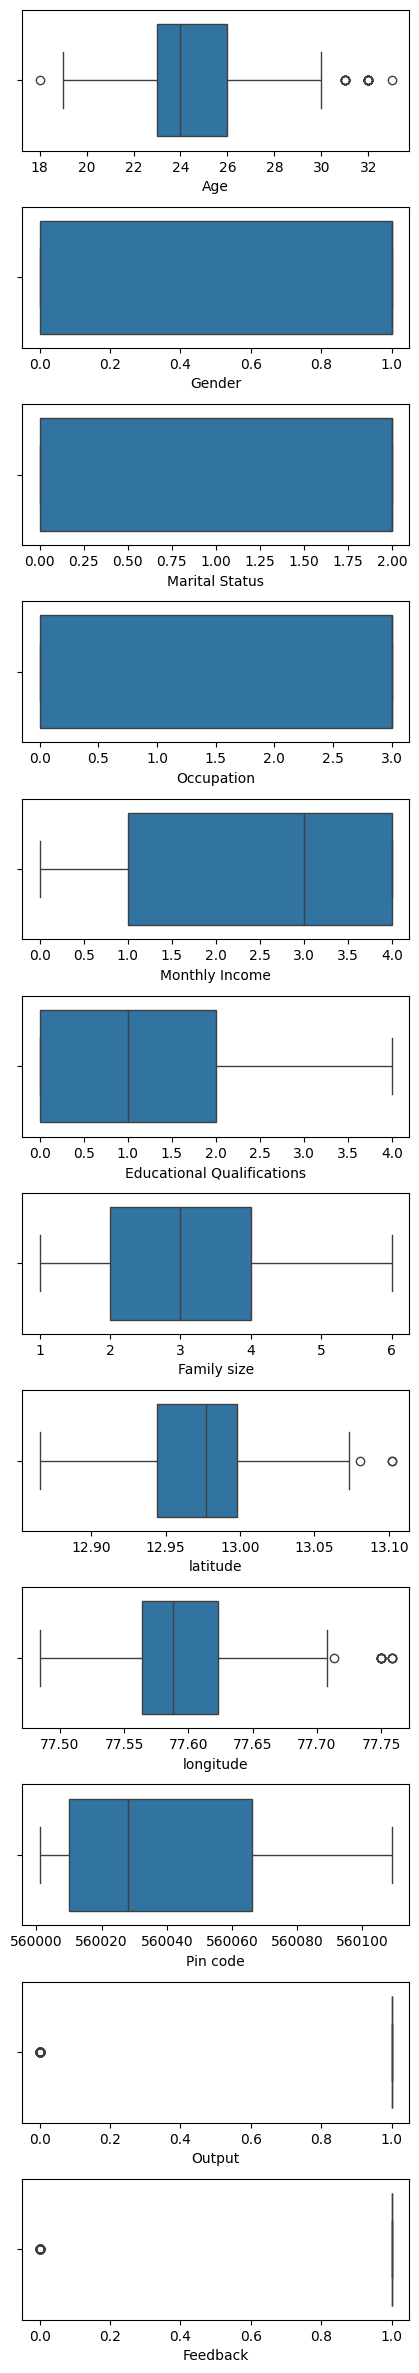

In [146]:
fig, ax = plt.subplots(nrows=len(columns), ncols=1, figsize=(5,30))
fig.subplots_adjust(hspace=0.4)
for i, column in enumerate(columns):
    sns.boxplot(x=column, data=df, ax=ax[i])

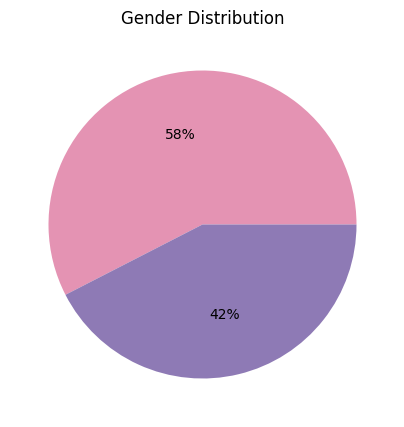

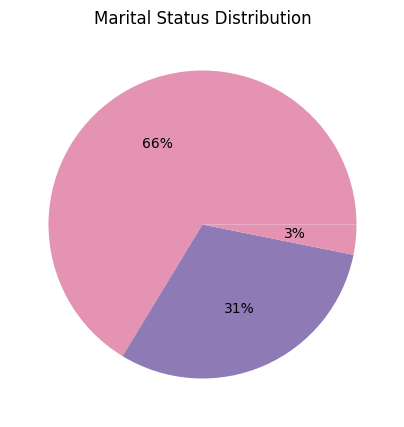

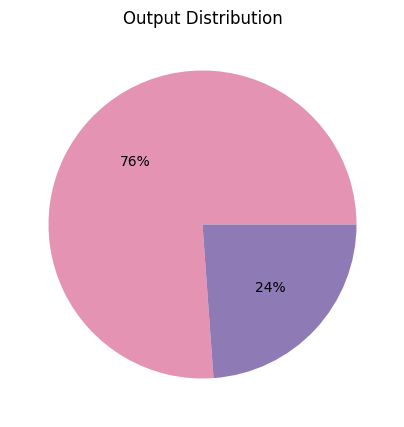

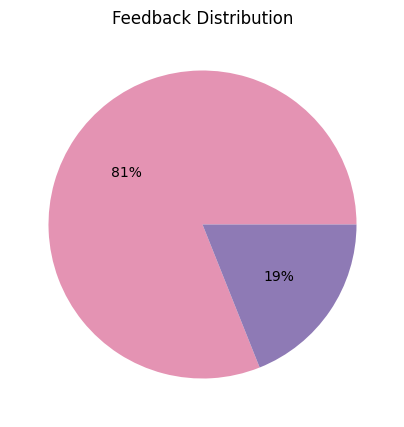

In [148]:
columns_binary = ['Gender','Marital Status','Output','Feedback']
for column in columns_binary:
    genre_count=df[column].value_counts()
    plt.figure(figsize=(5,5))
    plt.title(f"{column} Distribution")
    plt.pie(genre_count, autopct="%.0f%%", colors=["#E493B3","#8E7AB5"])

##### preprocessing:

In [128]:
df.duplicated().sum()

103

In [129]:
df.drop_duplicates(inplace=True)

In [130]:
cat_columns=[]
for col in df.columns:
    if(df[col].dtypes=='object'):
        cat_columns.append(col)
print(cat_columns)
for column in cat_columns:
    lable_encoder=LabelEncoder()
    df[column]=lable_encoder.fit_transform(df[column])
df.sample(5)

['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
63,23,1,2,3,4,0,4,12.9343,77.6044,560029,1,1
267,25,0,2,0,1,2,2,12.9967,77.7582,560067,1,1
106,26,1,2,0,3,2,2,12.9698,77.7500,560066,0,1
168,25,1,0,2,3,3,2,13.0626,77.5284,560015,1,1
222,26,1,0,0,0,0,4,12.9105,77.4842,560060,0,1


In [155]:
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
38,-0.552501,-1.164204,0.700456,0.878720,0.896635,0.867375,-0.198836,-0.675124,-0.445037,-1.084615,0.559789,0.483494
245,-0.881921,0.858956,0.700456,0.878720,-1.094593,-1.048919,-0.198836,0.110987,0.808167,0.023442,0.559789,0.483494
197,-1.211341,-1.164204,0.700456,0.878720,0.896635,0.867375,-1.670736,-1.178690,-0.074687,0.121212,0.559789,0.483494
169,2.082860,-1.164204,-1.481292,-1.344077,0.232892,-0.090772,1.273065,-0.164721,0.172213,-0.400227,0.559789,0.483494
231,1.753440,-1.164204,-1.481292,-0.603145,0.896635,1.825522,2.009015,0.213523,0.290052,0.153802,-1.786386,0.483494
